In [2]:
import numpy as np

arr = np.array([[1,2,3,4,5,np.nan,7,8,9],[1,2,np.nan,4,5,np.nan,7,8,9]])
print(arr)
print(np.isnan(arr))
newarr = arr[~np.isnan(arr)]
print(newarr)

[[ 1.  2.  3.  4.  5. nan  7.  8.  9.]
 [ 1.  2. nan  4.  5. nan  7.  8.  9.]]
[[False False False False False  True False False False]
 [False False  True False False  True False False False]]
[1. 2. 3. 4. 5. 7. 8. 9. 1. 2. 4. 5. 7. 8. 9.]


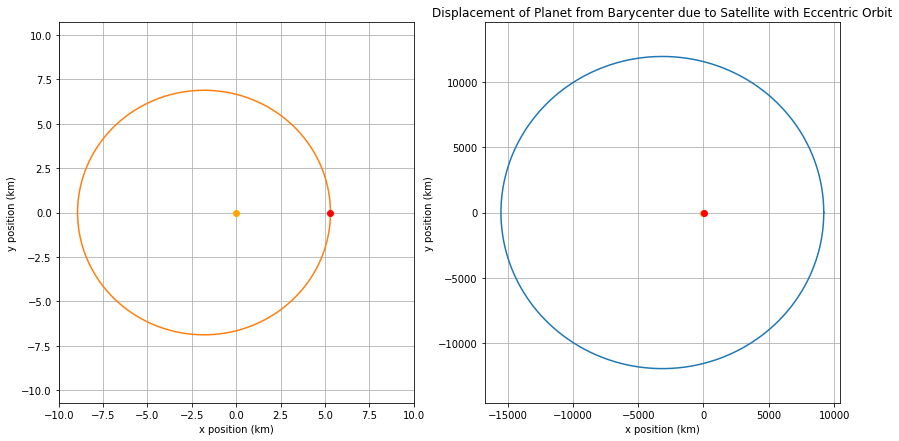

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Constants
m1 = 1.615e22  # Mass of the planet (e.g., Earth) in kg
m2 = 9.315e18  # Mass of the satellite (e.g., Moon) in kg
a = 12355e3    # Semi-major axis in meters
e = 0.2549     # Eccentricity of the Moon's orbit
G = 6.673e-11
T = 2*np.pi/np.sqrt(G*(m1+m2))*a**1.5  # Orbital period in seconds

# Time array
time = np.linspace(0, T, 1000)
M = 2 * np.pi * (time / T)  # Mean anomaly

# Solve Kepler's equation to find the eccentric anomaly E
def kepler(E, M, e):
    return E - e * np.sin(E) - M

E = np.array([fsolve(kepler, M_i, args=(M_i, e))[0] for M_i in M])

# Calculate the true anomaly θ
theta = 2 * np.arctan2(np.sqrt(1 + e) * np.sin(E / 2), np.sqrt(1 - e) * np.cos(E / 2))

# Calculate the distance r from the focus (planet)
r = a * (1 - e**2) / (1 + e * np.cos(theta))

# Satellite positions
x_satellite = r * np.cos(theta)/1000
y_satellite = r * np.sin(theta)/1000

# Barycenter positions
x_barycenter = (m2 / (m1 + m2)) * x_satellite
y_barycenter = (m2 / (m1 + m2)) * y_satellite

# Plotting
fig,ax = plt.subplots(1,2,figsize=(14, 7))
ax[0].plot(x_satellite, y_satellite, label='Satellite Orbit')
ax[0].plot(x_barycenter, y_barycenter, label='Barycenter Path')
ax[0].scatter(0, 0, color='orange', label='Planet', zorder=5)
ax[0].scatter(x_barycenter[0], y_barycenter[0], color='red', label='Initial Barycenter', zorder=5)
ax[0].set_xlabel('x position (km)')
ax[0].set_ylabel('y position (km)')
plt.title('Displacement of Planet from Barycenter due to Satellite with Eccentric Orbit')
ax[0].axis('equal')
ax[0].grid(True)
ax[0].set_xlim(-10,10)
ax[0].set_ylim(-10,10)

ax[1].plot(x_satellite, y_satellite, label='Satellite Orbit')
ax[1].plot(x_barycenter, y_barycenter, label='Barycenter Path')
ax[1].scatter(0, 0, color='orange', label='Planet', zorder=5)
ax[1].scatter(x_barycenter[0], y_barycenter[0], color='red', label='Initial Barycenter', zorder=5)
ax[1].set_xlabel('x position (km)')
ax[1].set_ylabel('y position (km)')
ax[1].axis('equal')
ax[1].grid(True)
#plt.xlim(-10000,10000)
#plt.ylim(-10000,10000)
plt.show()
#print(x_barycenter)

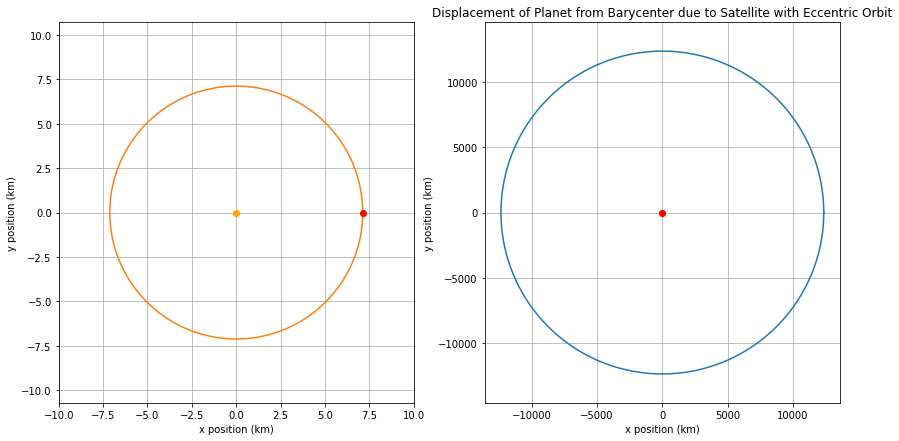

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Constants
m1 = 1.615e22  # Mass of the planet (e.g., Earth) in kg
m2 = 9.315e18  # Mass of the satellite (e.g., Moon) in kg
a = 12355e3    # Semi-major axis in meters
e = 0     # Eccentricity of the Moon's orbit
G = 6.673e-11
T = 2*np.pi/np.sqrt(G*(m1+m2))*a**1.5  # Orbital period in seconds

# Time array
time = np.linspace(0, T, 1000)
M = 2 * np.pi * (time / T)  # Mean anomaly

# Solve Kepler's equation to find the eccentric anomaly E
def kepler(E, M, e):
    return E - e * np.sin(E) - M

E = np.array([fsolve(kepler, M_i, args=(M_i, e))[0] for M_i in M])

# Calculate the true anomaly θ
theta = 2 * np.arctan2(np.sqrt(1 + e) * np.sin(E / 2), np.sqrt(1 - e) * np.cos(E / 2))

# Calculate the distance r from the focus (planet)
r = a * (1 - e**2) / (1 + e * np.cos(theta))

# Satellite positions
x_satellite = r * np.cos(theta)/1000
y_satellite = r * np.sin(theta)/1000

# Barycenter positions
x_barycenter = (m2 / (m1 + m2)) * x_satellite
y_barycenter = (m2 / (m1 + m2)) * y_satellite

# Plotting
fig,ax = plt.subplots(1,2,figsize=(14, 7))
ax[0].plot(x_satellite, y_satellite, label='Satellite Orbit')
ax[0].plot(x_barycenter, y_barycenter, label='Barycenter Path')
ax[0].scatter(0, 0, color='orange', label='Planet', zorder=5)
ax[0].scatter(x_barycenter[0], y_barycenter[0], color='red', label='Initial Barycenter', zorder=5)
ax[0].set_xlabel('x position (km)')
ax[0].set_ylabel('y position (km)')
plt.title('Displacement of Planet from Barycenter due to Satellite with Eccentric Orbit')
ax[0].axis('equal')
ax[0].grid(True)
ax[0].set_xlim(-10,10)
ax[0].set_ylim(-10,10)

ax[1].plot(x_satellite, y_satellite, label='Satellite Orbit')
ax[1].plot(x_barycenter, y_barycenter, label='Barycenter Path')
ax[1].scatter(0, 0, color='orange', label='Planet', zorder=5)
ax[1].scatter(x_barycenter[0], y_barycenter[0], color='red', label='Initial Barycenter', zorder=5)
ax[1].set_xlabel('x position (km)')
ax[1].set_ylabel('y position (km)')
ax[1].axis('equal')
ax[1].grid(True)
#plt.xlim(-10000,10000)
#plt.ylim(-10000,10000)
plt.show()

0.04781042956916238


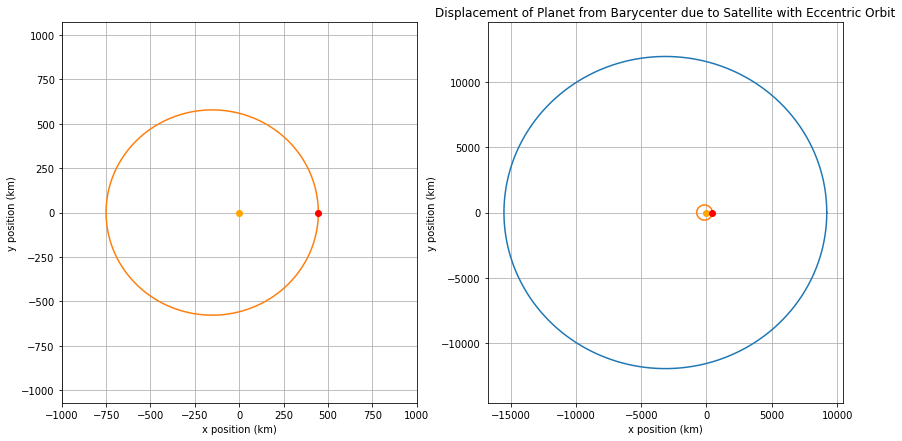

In [45]:
'''bright_ratio = f_val*mass_ratio**(2/3)
        
        rel_pos_lat = Model_DeltaLat[0,:]
        rel_pos_long = Model_DeltaLong[0,:]
        
        delta_offset_lat = bright_ratio*rel_pos_lat
        delta_offset_long = bright_ratio*rel_pos_long
        '''
#In other words, the brightness ratio * the relative astromtery is equal to the offset due to brghtness. 
#From the earlier model we say
f_val = 6.9
bright_ratio = f_val*(m2/m1)**(2/3)
print(bright_ratio)

x_satellite = r * np.cos(theta)/1000
y_satellite = r * np.sin(theta)/1000

# Barycenter positions
x_barycenter = (m2 / (m1 + m2)) * x_satellite + bright_ratio*x_satellite
y_barycenter = (m2 / (m1 + m2)) * y_satellite + bright_ratio*y_satellite

# Plotting
fig,ax = plt.subplots(1,2,figsize=(14, 7))
ax[0].plot(x_satellite, y_satellite, label='Satellite Orbit')
ax[0].plot(x_barycenter, y_barycenter, label='Barycenter Path')
ax[0].scatter(0, 0, color='orange', label='Planet', zorder=5)
ax[0].scatter(x_barycenter[0], y_barycenter[0], color='red', label='Initial Barycenter', zorder=5)
ax[0].set_xlabel('x position (km)')
ax[0].set_ylabel('y position (km)')
plt.title('Displacement of Planet from Barycenter due to Satellite with Eccentric Orbit')
ax[0].axis('equal')
ax[0].grid(True)
ax[0].set_xlim(-1000,1000)
ax[0].set_ylim(-1000,1000)

ax[1].plot(x_satellite, y_satellite, label='Satellite Orbit')
ax[1].plot(x_barycenter, y_barycenter, label='Barycenter Path')
ax[1].scatter(0, 0, color='orange', label='Planet', zorder=5)
ax[1].scatter(x_barycenter[0], y_barycenter[0], color='red', label='Initial Barycenter', zorder=5)
ax[1].set_xlabel('x position (km)')
ax[1].set_ylabel('y position (km)')
ax[1].axis('equal')
ax[1].grid(True)
#plt.xlim(-10000,10000)
#plt.ylim(-10000,10000)
plt.show()

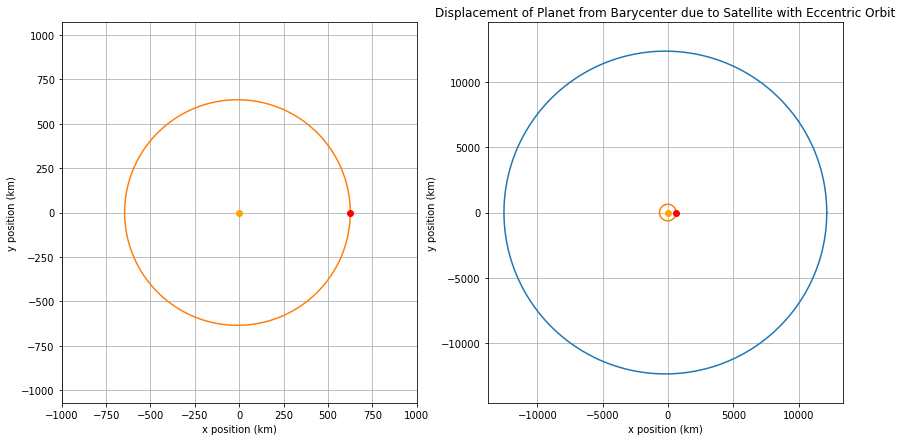

In [42]:
m1 = 1.54e22  # Mass of the planet (e.g., Earth) in kg
m2 = 8.35e20  # Mass of the satellite (e.g., Moon) in kg
a = 12355e3    # Semi-major axis in meters
e = 0.016     # Eccentricity of the Moon's orbit
G = 6.673e-11
T = 2*np.pi/np.sqrt(G*(m1+m2))*a**1.5  # Orbital period in seconds

# Time array
time = np.linspace(0, T, 1000)
M = 2 * np.pi * (time / T)  # Mean anomaly

# Solve Kepler's equation to find the eccentric anomaly E
def kepler(E, M, e):
    return E - e * np.sin(E) - M

E = np.array([fsolve(kepler, M_i, args=(M_i, e))[0] for M_i in M])

# Calculate the true anomaly θ
theta = 2 * np.arctan2(np.sqrt(1 + e) * np.sin(E / 2), np.sqrt(1 - e) * np.cos(E / 2))

# Calculate the distance r from the focus (planet)
r = a * (1 - e**2) / (1 + e * np.cos(theta))

# Satellite positions
x_satellite = r * np.cos(theta)/1000
y_satellite = r * np.sin(theta)/1000

# Barycenter positions
x_barycenter_dis = (m2 / (m1 + m2)) * x_satellite
y_barycenter_dis = (m2 / (m1 + m2)) * y_satellite

# Plotting
fig,ax = plt.subplots(1,2,figsize=(14, 7))
ax[0].plot(x_satellite, y_satellite, label='Satellite Orbit')
ax[0].plot(x_barycenter_dis, y_barycenter_dis, label='Barycenter Path')
ax[0].scatter(0, 0, color='orange', label='Planet', zorder=5)
ax[0].scatter(x_barycenter_dis[0], y_barycenter_dis[0], color='red', label='Initial Barycenter', zorder=5)
ax[0].set_xlabel('x position (km)')
ax[0].set_ylabel('y position (km)')
plt.title('Displacement of Planet from Barycenter due to Satellite with Eccentric Orbit')
ax[0].axis('equal')
ax[0].grid(True)
ax[0].set_xlim(-1000,1000)
ax[0].set_ylim(-1000,1000)

ax[1].plot(x_satellite, y_satellite, label='Satellite Orbit')
ax[1].plot(x_barycenter_dis, y_barycenter_dis, label='Barycenter Path')
ax[1].scatter(0, 0, color='orange', label='Planet', zorder=5)
ax[1].scatter(x_barycenter_dis[0], y_barycenter_dis[0], color='red', label='Initial Barycenter', zorder=5)
ax[1].set_xlabel('x position (km)')
ax[1].set_ylabel('y position (km)')
ax[1].axis('equal')
ax[1].grid(True)
#plt.xlim(-10000,10000)
#plt.ylim(-10000,10000)
plt.show()

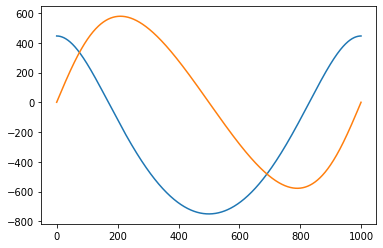

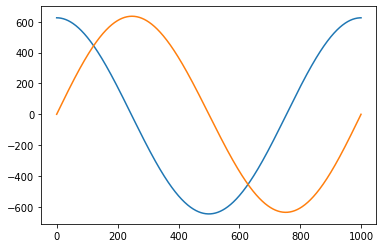

-104.5947379078242
-179.840806355628
109.68147901815922
-57.289838606561716
625.2763905143208


In [26]:
plt.plot(x_barycenter)
plt.plot(y_barycenter)
plt.show()
plt.plot(x_barycenter_dis)
plt.plot(y_barycenter_dis)
plt.show()

print(np.max(x_barycenter-x_barycenter_dis))

print(np.max(x_barycenter)-np.max(x_barycenter_dis))

print(np.max(y_barycenter-y_barycenter_dis))

print(np.max(y_barycenter)-np.max(y_barycenter_dis))

print(np.max(x_barycenter_dis))

In [129]:
from astroquery.jplhorizons import Horizons

# Eris
obj = Horizons(id='136199', location='500@0', epochs=None)
vec = obj.vectors()

# Distance from Earth (AU)
distance_au = (vec['x'] ** 2 + vec['y'] ** 2 + vec['z'] ** 2) ** 0.5
distance_km = distance_au * 1.496e+8  

print(np.arctan(625.276/distance_km)/np.pi*180*3600*1000*2,'milliarcsecond variation in Eris astrometry')
print(T/60/60/24,'day period of variation')


        X         
------------------
18.025244221368467 milliarcsecond variation in Eris astrometry
3.041292665653623 day period of variation


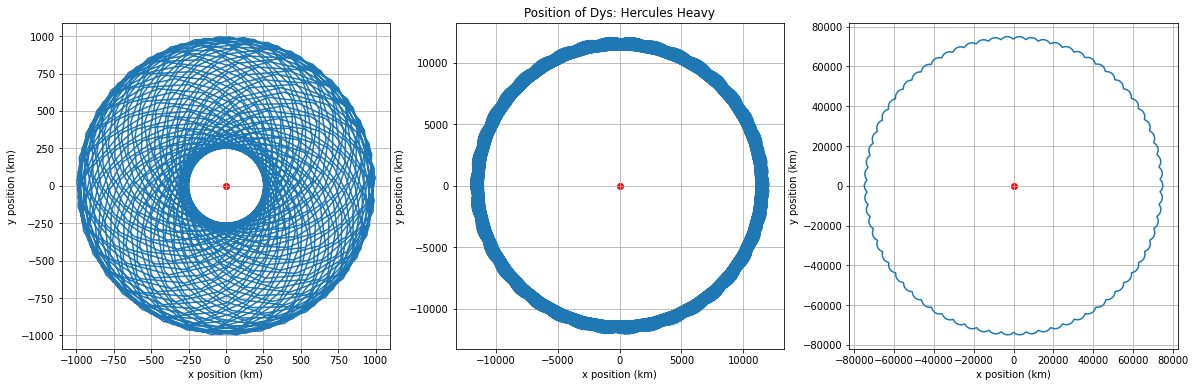

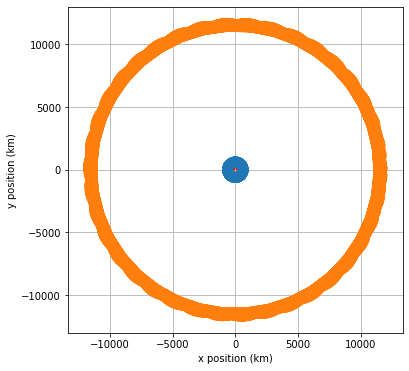

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-11  # Gravitational constant in m^3 kg^-1 s^-2

m1 = 1.54e22  # Mass of the planet (e.g., Eris) in kg
m2 = 8.35e20  # Mass of the satellite (e.g., Herc) in kg
a2 = 12355e3  #Eris-Herc

m3 = 7.99e19    # Mass of Dysnomia in kg
a1 = 37365e3    # Eris-Dys

# Orbital periods (seconds)
T1 = 2 * np.pi * np.sqrt(a1**3 / (G * m3))  # Earth around Sun
T2 = 2 * np.pi * np.sqrt(a2**3 / (G * (m1 + m2)))  # Moon around Earth

# Time array
time = np.linspace(0, T1, 1000)

# Positions assuming circular orbits
x_sun = -a1 * np.cos(2 * np.pi * time / T1)
y_sun = -a1 * np.sin(2 * np.pi * time / T1)
z_sun = np.zeros_like(x_sun)

x_earth = a1 * np.cos(2 * np.pi * time / T1)
y_earth = a1 * np.sin(2 * np.pi * time / T1)
z_earth = np.zeros_like(x_earth)

#x_earth = np.zeros(len(time))
#y_earth = np.zeros(len(time))

x_moon = x_earth + a2 * np.cos(2 * np.pi * time / T2)
y_moon = y_earth + a2 * np.sin(2 * np.pi * time / T2)
z_moon = np.zeros_like(x_moon)

# Calculate barycenter
x_barycenter = (m1 * x_earth + m2 * x_moon + m3 * x_sun) / (m1 + m2 + m3)
y_barycenter = (m1 * y_earth + m2 * y_moon + m3 * y_sun) / (m1 + m2 + m3)

# Position of Earth relative to barycenter
x_earth_relative = x_earth - x_barycenter
y_earth_relative = y_earth - y_barycenter

x_sun_relative = x_sun - x_barycenter
y_sun_relative = y_sun - y_barycenter

x_moon_relative = x_moon - x_barycenter
y_moon_relative = y_moon - y_barycenter

# Plotting
fig,ax = plt.subplots(1,3,figsize=(20, 6))
ax[0].plot(x_earth_relative/1000, y_earth_relative/1000, label='Eris Relative to Barycenter')
ax[0].scatter(0, 0, color='red', label='Barycenter')
ax[0].set_xlabel('x position (km)')
ax[0].set_ylabel('y position (km)')
ax[1].set_title('Position of Eris: Hercules Heavy')

ax[0].axis('equal')
ax[0].grid(True)

ax[1].plot(x_moon_relative/1000, y_moon_relative/1000, label='Herc Relative to Barycenter')
ax[1].scatter(0, 0, color='red', label='Barycenter')
ax[1].set_xlabel('x position (km)')
ax[1].set_ylabel('y position (km)')
ax[1].set_title('Position of Herc: Hercules Heavy')
ax[1].axis('equal')
ax[1].grid(True)

ax[2].plot(x_sun_relative/1000, y_sun_relative/1000, label='Dys Relative to Barycenter')
ax[2].scatter(0, 0, color='red', label='Barycenter')
ax[2].set_xlabel('x position (km)')
ax[1].set_title('Position of Dys: Hercules Heavy')
ax[2].set_ylabel('y position (km)')
ax[2].axis('equal')
ax[2].grid(True)
plt.show()

plt.figure(figsize=(6,6))
plt.plot(x_earth_relative/1000, y_earth_relative/1000, label='Eris Relative to Barycenter')
plt.plot(x_moon_relative/1000, y_moon_relative/1000, label='Eris Relative to Barycenter')
plt.plot(x_sun_relative/1000, y_sun_relative/1000, label='Eris Relative to Barycenter')
plt.scatter(0, 0, color='red', label='Barycenter')
plt.xlabel('x position (km)')
plt.ylabel('y position (km)')
plt.grid(True)
plt.axis('Equal')
plt.xlim(-13000,13000)
plt.ylim(-13000,13000)
plt.show()

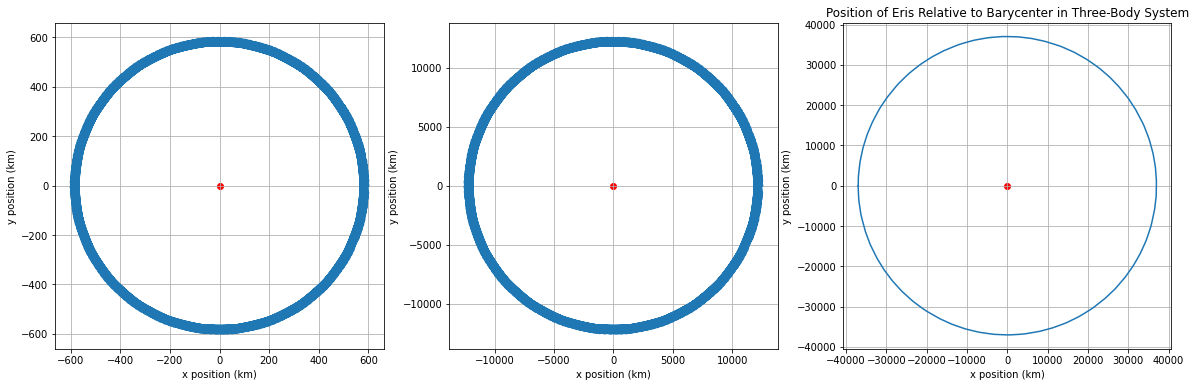

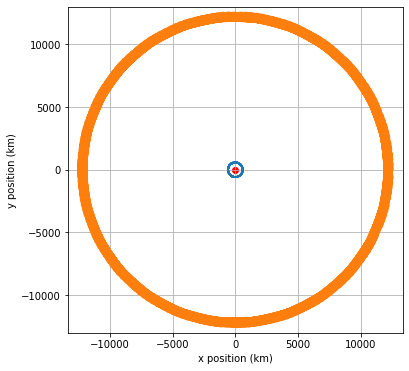

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-11  # Gravitational constant in m^3 kg^-1 s^-2

m1 = 1.616e22  # Mass of the planet (e.g., Eris) in kg
m2 = 2.7e19  # Mass of the satellite (e.g., Herc) in kg
a2 = 12354e3  #Eris-Herc

m3 = 1.063e20    # Mass of Dysnomia in kg
a1 = 37250e3    # Eris-Dys

# Orbital periods (seconds)
T1 = 2 * np.pi * np.sqrt(a1**3 / (G * m3))  # Earth around Sun
T2 = 2 * np.pi * np.sqrt(a2**3 / (G * (m1 + m2)))  # Moon around Earth

# Time array
time = np.linspace(0, T1, 1000)

# Positions assuming circular orbits
x_sun = -a1 * np.cos(2 * np.pi * time / T1)
y_sun = -a1 * np.sin(2 * np.pi * time / T1)

x_earth = a1 * np.cos(2 * np.pi * time / T1)
y_earth = a1 * np.sin(2 * np.pi * time / T1)

x_earth = np.zeros(len(time))
y_earth = np.zeros(len(time))

x_moon = x_earth + a2 * np.cos(2 * np.pi * time / T2)
y_moon = y_earth + a2 * np.sin(2 * np.pi * time / T2)

# Calculate barycenter
x_barycenter = (m1 * x_earth + m2 * x_moon + m3 * x_sun) / (m1 + m2 + m3)
y_barycenter = (m1 * y_earth + m2 * y_moon + m3 * y_sun) / (m1 + m2 + m3)

# Position of Earth relative to barycenter
x_earth_relative = x_earth - x_barycenter
y_earth_relative = y_earth - y_barycenter

x_sun_relative = x_sun - x_barycenter
y_sun_relative = y_sun - y_barycenter

x_moon_relative = x_moon - x_barycenter
y_moon_relative = y_moon - y_barycenter

x_earth_relative = x_earth + bright_ratio*x_moon_relative
y_earth_relative = y_earth + bright_ratio*y_moon_relative


# Plotting
fig,ax = plt.subplots(1,3,figsize=(20, 6))
ax[0].plot(x_earth_relative/1000, y_earth_relative/1000, label='Eris Relative to Barycenter')
ax[0].scatter(0, 0, color='red', label='Barycenter')
ax[0].set_xlabel('x position (km)')
ax[0].set_ylabel('y position (km)')
plt.title('Position of Eris Relative to Barycenter in Three-Body System')

ax[0].axis('equal')
ax[0].grid(True)

ax[1].plot(x_moon_relative/1000, y_moon_relative/1000, label='Herc Relative to Barycenter')
ax[1].scatter(0, 0, color='red', label='Barycenter')
ax[1].set_xlabel('x position (km)')
ax[1].set_ylabel('y position (km)')
ax[1].axis('equal')
ax[1].grid(True)

ax[2].plot(x_sun_relative/1000, y_sun_relative/1000, label='Dys Relative to Barycenter')
ax[2].scatter(0, 0, color='red', label='Barycenter')
ax[2].set_xlabel('x position (km)')
ax[2].set_ylabel('y position (km)')
ax[2].axis('equal')
ax[2].grid(True)
plt.show()

plt.figure(figsize=(6,6))
plt.plot(x_earth_relative/1000, y_earth_relative/1000, label='Eris Relative to Barycenter')
plt.plot(x_moon_relative/1000, y_moon_relative/1000, label='Eris Relative to Barycenter')
plt.plot(x_sun_relative/1000, y_sun_relative/1000, label='Eris Relative to Barycenter')
plt.scatter(0, 0, color='red', label='Barycenter')
plt.xlabel('x position (km)')
plt.ylabel('y position (km)')
plt.grid(True)
plt.axis('Equal')
plt.xlim(-13000,13000)
plt.ylim(-13000,13000)
plt.show()

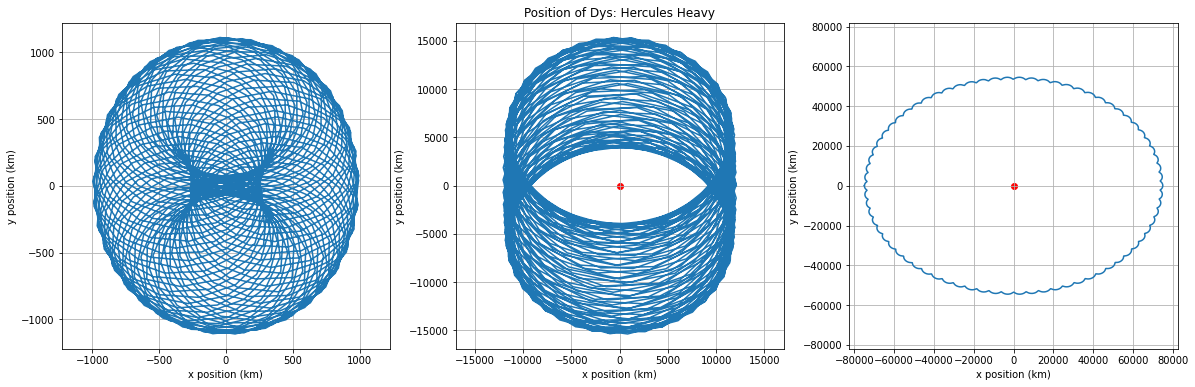

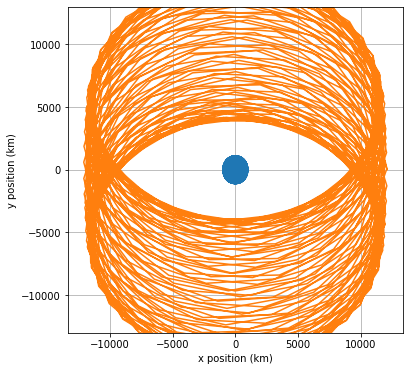

In [83]:
G = 6.67430e-11  # Gravitational constant in m^3 kg^-1 s^-2

m1 = 1.54e22  # Mass of the planet (e.g., Eris) in kg
m2 = 8.35e20  # Mass of the satellite (e.g., Herc) in kg
a2 = 12355e3  #Eris-Herc

m3 = 7.99e19    # Mass of Dysnomia in kg
a1 = 37365e3    # Eris-Dys

# Orbital periods (seconds)
T1 = 2 * np.pi * np.sqrt(a1**3 / (G * m3))  # Earth around Sun
T2 = 2 * np.pi * np.sqrt(a2**3 / (G * (m1 + m2)))  # Moon around Earth

# Time array
time = np.linspace(0, T1, 1000)
x_sun = -a1 * np.cos(2 * np.pi * time / T1)
y_sun = -a1 * np.sin(2 * np.pi * time / T1)
z_sun = np.zeros_like(x_sun)

x_earth = a1 * np.cos(2 * np.pi * time / T1)
y_earth = a1 * np.sin(2 * np.pi * time / T1)
z_earth = np.zeros_like(x_earth)

#x_earth = np.zeros(len(time))
#y_earth = np.zeros(len(time))

x_moon = x_earth + a2 * np.cos(2 * np.pi * time / T2)
y_moon = y_earth + a2 * np.sin(2 * np.pi * time / T2)
z_moon = np.zeros_like(x_moon)
i1_degrees = 62.5  # Inclination of Earth's orbit around the Sun
i2_degrees = 33.5  # Inclination of Moon's orbit around the Earth

# Convert inclination angles to radians
i1_radians = np.radians(i1_degrees)
i2_radians = np.radians(i2_degrees)

# Rotation matrix for Earth's inclination (around x-axis)
R_x_sun = np.array([
    [1, 0, 0],
    [0, np.cos(i1_radians), -np.sin(i1_radians)],
    [0, np.sin(i1_radians), np.cos(i1_radians)]
])

# Rotation matrix for Moon's inclination (around x-axis)
R_x_moon = np.array([
    [1, 0, 0],
    [0, np.cos(i2_radians), -np.sin(i2_radians)],
    [0, np.sin(i2_radians), np.cos(i2_radians)]
])

# Apply rotation matrices
sun_rotated = np.dot(R_x_sun, np.array([x_sun, y_sun, z_sun]))
moon_rotated = np.dot(R_x_moon, np.array([x_moon, y_moon, z_moon]))

# Calculate barycenter
x_barycenter = (m1 * x_earth + m2 * moon_rotated[0] + m3 * sun_rotated[0]) / (m1 + m2 + m3)
y_barycenter = (m1 * y_earth + m2 * moon_rotated[1] + m3 * sun_rotated[1]) / (m1 + m2 + m3)
z_barycenter = (m1 * z_earth + m2 * moon_rotated[2] + m3 * sun_rotated[2]) / (m1 + m2 + m3)

# Position of Earth relative to barycenter
x_earth_relative = x_earth - x_barycenter
y_earth_relative = y_earth - y_barycenter
z_earth_relative = z_earth - z_barycenter 

x_sun_relative = sun_rotated[0] - x_barycenter
y_sun_relative = sun_rotated[1] - y_barycenter
z_sun_relative = sun_rotated[2] - z_barycenter

x_moon_relative = moon_rotated[0] - x_barycenter
y_moon_relative = moon_rotated[1] - y_barycenter
z_moon_relative = moon_rotated[2] - z_barycenter

fig,ax = plt.subplots(1,3,figsize=(20, 6))
ax[0].plot(x_earth_relative/1000, y_earth_relative/1000, label='Eris Relative to Barycenter')
ax[0].scatter(0, 0, color='red', label='Barycenter')
ax[0].set_xlabel('x position (km)')
ax[0].set_ylabel('y position (km)')
ax[1].set_title('Position of Eris: Hercules Heavy')

ax[0].axis('equal')
ax[0].grid(True)

ax[1].plot(x_moon_relative/1000, y_moon_relative/1000, label='Herc Relative to Barycenter')
ax[1].scatter(0, 0, color='red', label='Barycenter')
ax[1].set_xlabel('x position (km)')
ax[1].set_ylabel('y position (km)')
ax[1].set_title('Position of Herc: Hercules Heavy')
ax[1].axis('equal')
ax[1].grid(True)

ax[2].plot(x_sun_relative/1000, y_sun_relative/1000, label='Dys Relative to Barycenter')
ax[2].scatter(0, 0, color='red', label='Barycenter')
ax[2].set_xlabel('x position (km)')
ax[1].set_title('Position of Dys: Hercules Heavy')
ax[2].set_ylabel('y position (km)')
ax[2].axis('equal')
ax[2].grid(True)
plt.show()

plt.figure(figsize=(6,6))
plt.plot(x_earth_relative/1000, y_earth_relative/1000, label='Eris Relative to Barycenter')
plt.plot(x_moon_relative/1000, y_moon_relative/1000, label='Eris Relative to Barycenter')
plt.plot(x_sun_relative/1000, y_sun_relative/1000, label='Eris Relative to Barycenter')
plt.scatter(0, 0, color='red', label='Barycenter')
plt.xlabel('x position (km)')
plt.ylabel('y position (km)')
plt.grid(True)
plt.axis('Equal')
plt.xlim(-13000,13000)
plt.ylim(-13000,13000)
plt.show()

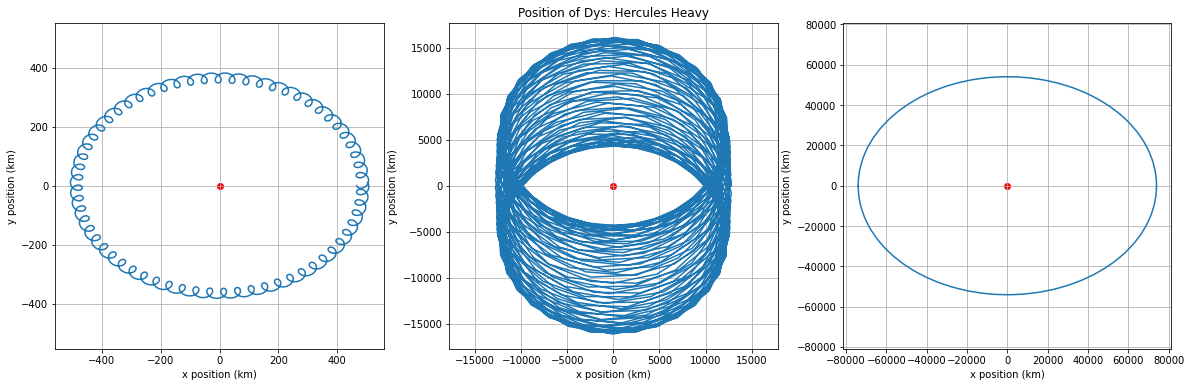

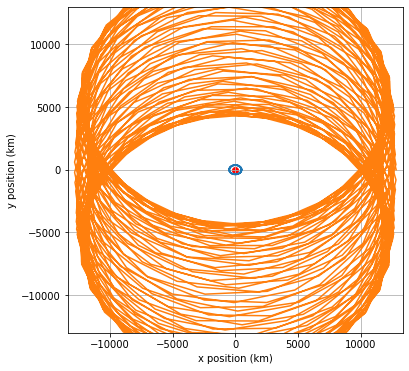

In [84]:
G = 6.67430e-11  # Gravitational constant in m^3 kg^-1 s^-2

m1 = 1.616e22  # Mass of the planet (e.g., Eris) in kg
m2 = 2.7e19  # Mass of the satellite (e.g., Herc) in kg
a2 = 12354e3  #Eris-Herc

m3 = 1.063e20    # Mass of Dysnomia in kg
a1 = 37250e3    # Eris-Dys

# Orbital periods (seconds)
T1 = 2 * np.pi * np.sqrt(a1**3 / (G * m3))  # Earth around Sun
T2 = 2 * np.pi * np.sqrt(a2**3 / (G * (m1 + m2)))  # Moon around Earth

# Time array
time = np.linspace(0, T1, 1000)
x_sun = -a1 * np.cos(2 * np.pi * time / T1)
y_sun = -a1 * np.sin(2 * np.pi * time / T1)
z_sun = np.zeros_like(x_sun)

x_earth = a1 * np.cos(2 * np.pi * time / T1)
y_earth = a1 * np.sin(2 * np.pi * time / T1)
z_earth = np.zeros_like(x_earth)

#x_earth = np.zeros(len(time))
#y_earth = np.zeros(len(time))

x_moon = x_earth + a2 * np.cos(2 * np.pi * time / T2)
y_moon = y_earth + a2 * np.sin(2 * np.pi * time / T2)
z_moon = np.zeros_like(x_moon)
i1_degrees = 62.5  # Inclination of Earth's orbit around the Sun
i2_degrees = 33.5  # Inclination of Moon's orbit around the Earth

# Convert inclination angles to radians
i1_radians = np.radians(i1_degrees)
i2_radians = np.radians(i2_degrees)

# Rotation matrix for Earth's inclination (around x-axis)
R_x_sun = np.array([
    [1, 0, 0],
    [0, np.cos(i1_radians), -np.sin(i1_radians)],
    [0, np.sin(i1_radians), np.cos(i1_radians)]
])

# Rotation matrix for Moon's inclination (around x-axis)
R_x_moon = np.array([
    [1, 0, 0],
    [0, np.cos(i2_radians), -np.sin(i2_radians)],
    [0, np.sin(i2_radians), np.cos(i2_radians)]
])

# Apply rotation matrices
sun_rotated = np.dot(R_x_sun, np.array([x_sun, y_sun, z_sun]))
moon_rotated = np.dot(R_x_moon, np.array([x_moon, y_moon, z_moon]))

# Calculate barycenter
x_barycenter = (m1 * x_earth + m2 * moon_rotated[0] + m3 * sun_rotated[0]) / (m1 + m2 + m3)
y_barycenter = (m1 * y_earth + m2 * moon_rotated[1] + m3 * sun_rotated[1]) / (m1 + m2 + m3)
z_barycenter = (m1 * z_earth + m2 * moon_rotated[2] + m3 * sun_rotated[2]) / (m1 + m2 + m3)

# Position of Earth relative to barycenter
x_earth_relative = x_earth - x_barycenter
y_earth_relative = y_earth - y_barycenter
z_earth_relative = z_earth - z_barycenter 

x_sun_relative = sun_rotated[0] - x_barycenter
y_sun_relative = sun_rotated[1] - y_barycenter
z_sun_relative = sun_rotated[2] - z_barycenter

x_moon_relative = moon_rotated[0] - x_barycenter
y_moon_relative = moon_rotated[1] - y_barycenter
z_moon_relative = moon_rotated[2] - z_barycenter

fig,ax = plt.subplots(1,3,figsize=(20, 6))
ax[0].plot(x_earth_relative/1000, y_earth_relative/1000, label='Eris Relative to Barycenter')
ax[0].scatter(0, 0, color='red', label='Barycenter')
ax[0].set_xlabel('x position (km)')
ax[0].set_ylabel('y position (km)')
ax[1].set_title('Position of Eris: Hercules Heavy')

ax[0].axis('equal')
ax[0].grid(True)

ax[1].plot(x_moon_relative/1000, y_moon_relative/1000, label='Herc Relative to Barycenter')
ax[1].scatter(0, 0, color='red', label='Barycenter')
ax[1].set_xlabel('x position (km)')
ax[1].set_ylabel('y position (km)')
ax[1].set_title('Position of Herc: Hercules Heavy')
ax[1].axis('equal')
ax[1].grid(True)

ax[2].plot(x_sun_relative/1000, y_sun_relative/1000, label='Dys Relative to Barycenter')
ax[2].scatter(0, 0, color='red', label='Barycenter')
ax[2].set_xlabel('x position (km)')
ax[1].set_title('Position of Dys: Hercules Heavy')
ax[2].set_ylabel('y position (km)')
ax[2].axis('equal')
ax[2].grid(True)
plt.show()

plt.figure(figsize=(6,6))
plt.plot(x_earth_relative/1000, y_earth_relative/1000, label='Eris Relative to Barycenter')
plt.plot(x_moon_relative/1000, y_moon_relative/1000, label='Eris Relative to Barycenter')
plt.plot(x_sun_relative/1000, y_sun_relative/1000, label='Eris Relative to Barycenter')
plt.scatter(0, 0, color='red', label='Barycenter')
plt.xlabel('x position (km)')
plt.ylabel('y position (km)')
plt.grid(True)
plt.axis('Equal')
plt.xlim(-13000,13000)
plt.ylim(-13000,13000)
plt.show()

In [134]:
fval = 7
m2 = 1.063e19
m1 = 1.616e22
ratio = fval*(m2/m1)**(2/3)
perc_eris = 1/(1+ratio)
print('percent of PSF:',ratio*perc_eris)
print('ratio:',ratio)
print(perc_eris)
print(m2/m1)

percent of PSF: 0.05028289113101813
ratio: 0.052945125091933984
0.9497171088689819
0.0006577970297029703


In [123]:
sa_total = 1163**2 #sa_eris+sa_herc
sa_eris = np.sqrt(sa_total*(perc_eris))
sa_herc = np.sqrt(sa_total*(1-perc_eris))
print(sa_eris,sa_herc)

print(np.sqrt(sa_eris**2+sa_herc**2))

1133.3833950723867 260.78933984001355
1163.0


In [124]:
1133**2

1283689

In [125]:
260**2

67600

In [126]:
eris = 1163
total = eris**2/perc_eris
herc = np.sqrt(total*(1-perc_eris))
print(herc)

267.6040636845264


In [130]:
newalb = 0.96*eris**2/(eris**2+herc**2)
print(newalb)

0.9117284245142225


# Angular Momentum Calc

In [132]:
m1 = 1.616e22  # Mass of the planet (e.g., Eris) in kg
ax1 = 1163e3
m2 = 2.7e19  # Mass of the satellite (e.g., Herc) in kg
a2 = 12354e3  #Eris-Herc

m3 = 1.063e20    # Mass of Dysnomia in kg
a1 = 37250e3    # Eris-Dys

TEris = 15.78*24*60*60
omEris = 2*np.pi/TEris
IEris = 2/5*m1*ax1**2
LEris = IEris*omEris

vDys = np.sqrt(G*m3/a1)
LDys = m3*vDys*a1

vHerc = np.sqrt(G*m2/a2)
LHerc = m2*vHerc*a2

Ltotal = LHerc+LDys+LEris
print('LEris:',LEris/Ltotal)
print('LHerc:',LHerc/Ltotal)
print('LDys:',LDys/Ltotal)

LEris: 0.4071240307661501
LHerc: 0.040706066709999794
LDys: 0.5521699025238501


In [133]:
265e18/9.8e18

27.040816326530614